In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np #For Alegbra
import pandas as pd #For Data Processing
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization

from sklearn.preprocessing import MinMaxScaler #Preprocessing
from sklearn.model_selection import train_test_split #Preprocessing

from sklearn.linear_model import LinearRegression #Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

In [3]:
data_2015 = pd.read_csv("Project_Data/2015.csv")
data_2016 = pd.read_csv("Project_Data/2016.csv")
data_2017 = pd.read_csv("Project_Data/2017.csv")
data_2018 = pd.read_csv("Project_Data/2018.csv")
data_2019 = pd.read_csv("Project_Data/2019.csv")

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Context set-up </p><br>
The World Happiness Report was first started in the year 2011. Officials from all over the world have participated and took a resolution to measure the happiness of their people and to use the data to help guide public policy.
The first report outlined cause of happiness, misery, affect of policy implications on people. Later on they went on adding up other factors that could potentially influence the happiness level.

Happiness Indexes are becoming extremely important in todays globalized economy and helping many policy makers craft plans. For example, In Bhutan, the country’s development is calculated upon gross domestic happiness instead of gross domestic product.
The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be.  The reoirts are used to support and derive insights for UN High level meeting on “Wellbeing and Happiness: Defining a New Economic Paradigm”.


The World Happiness Report is a publication of the Sustainable Development Solutions Network, powered by data from the Gallup World Poll and Lloyd’s Register Foundation, who provided access to the World Risk Poll. Gallup conducts surveys in more than 140 countries every single year and asks people about how their lives are going. The data are then compiled by the United Nations Sustainable Development Solutions Network into a global report known as the World Happiness Report, which announces the happiest country in the world -- and explains what makes its people so happy.

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Aim of the Project </p><br>

In the project, we will be using data from the Year 2015 to the Year 2019. Based on our literature review, we understand that the while the world happiness report does provide an alternative to policy and decision makers instead of the usual GDP per captia, it has been 
heavily critized for ultimately being too reliant on GDP per capita. Some researchers have claimed that it merely just affirims the notion that the richer you are the happier you will be. 

Therefore, in our data exploration stages, we will explore the sperad of the data in the different yeears, understand the correlation of the different variables through different graphs and charts. We will also aim to use test different machine learning models and choose the best model to help us predict future values. 

We want to test the claim of the critics that ultimately, a country with high GDP per captia and almost no freedom will still be happier than a country with full freeedom but realtaively low GDP per capita. 

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Data Cleaning </p><br>

In each years dataset, we noticed that the column names are different and there are additional columns that vary acrross the different years. For our analysis, exlcuding the dependent variable which is Happiness Score, we are interested in the 6 other independent varialbes as below. 

1. Gross Domestic Product per capita (GDP per capita) - Value of all the goods and services a country produces on a yearly basis/ Total country population
2. Healthy Life Expectancy - Average number of “healthy” years a child at birth is estimated to live
3. Social Support - If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?
4. Freedom to make life choices - Freedom to choose what you do with your life.
5. Generosity - Donated money/service to a charity in the past month?
6. Perception of corruption – Is corruption widespread throughout government/within business?

We will clean the different data sets and rename all the columns as below 
1. Happiness_Score	
2. GDP_percaptia	
3. Social_support	
4. Healthy_lifeexpectancy	
5. Freedom_of_choice	
6. Perception_corruption	
7. Generosity	



We also observed that some of the years had a region column that broke up the different countires into specific region. Therefore using 2016 as a benchmarch, we will also be creating a region column for the years that do not have it. 


In [4]:
data_2015.head(1)
data_2016.head(1)
data_2017.head(1)
data_2018.head(1)
data_2019.head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.46,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Cleaning 2015 Data </p><br>



In [5]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
data_2015.rename(columns={'Happiness Score':'Happiness_Score',
                          'Economy (GDP per Capita)':'GDP_percaptia',
                          'Family':'Social_support',
                          'Health (Life Expectancy)':'Healthy_lifeexpectancy', 
                          'Freedom':'Freedom_of_choice',
                          'Trust (Government Corruption)':'Perception_corruption'}, inplace = True)

data_2015.drop(['Happiness Rank','Standard Error','Dystopia Residual'],inplace = True, axis=1)

<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Function to create Happiness Level variable </p><br>

Below, we will be defining a function that will create a happiness vraible of 'Very Happy' and 'Less Happy' based on the mean score from the combined dataset and external literature review that set a Mean Happiness Score of 5.3 categorize countires with higher happiness levels. 

Ultimately, instead of predicting the exact happiness scores, it can be more handy to predict whether a country will be more or less happiness based on its independent variables as mentioned earlier.
We will use the happiness level variable to test classifier models too.

In [7]:
def create_category(score):
    if (score >= 5.3):
        return "Very Happy"
    else:
        return "Less Happy"

data_2015['Happiness_Level'] = data_2015['Happiness_Score'].apply(lambda x: create_category(x))


In [8]:
data_2015.head()

,Country,Region,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity,Happiness_Level
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Very Happy
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Very Happy
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Very Happy
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Very Happy
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Very Happy


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Cleaning 2016 Data </p><br>


In [9]:
data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [10]:
data_2016.rename(columns={'Happiness Score':'Happiness_Score',
                          'Economy (GDP per Capita)':'GDP_percaptia',
                          'Family':'Social_support',
                          'Health (Life Expectancy)':'Healthy_lifeexpectancy', 
                          'Freedom':'Freedom_of_choice',
                          'Trust (Government Corruption)':'Perception_corruption'}, inplace = True)

data_2016.drop(['Happiness Rank','Lower Confidence Interval','Upper Confidence Interval','Dystopia Residual'],inplace = True, axis=1)

In [11]:
data_2016['Happiness_Level'] = data_2016['Happiness_Score'].apply(lambda x: create_category(x))

In [12]:
data_2016.head()

,Country,Region,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity,Happiness_Level
0,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,Very Happy
1,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,Very Happy
2,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,Very Happy
3,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,Very Happy
4,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,Very Happy


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Cleaning 2017 Data </p><br>


In [13]:
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [14]:
data_2017.rename(columns={'Happiness.Score':'Happiness_Score',
                          'Economy..GDP.per.Capita.':'GDP_percaptia',
                          'Family':'Social_support',
                          'Health..Life.Expectancy.':'Healthy_lifeexpectancy', 
                          'Freedom':'Freedom_of_choice',
                          'Trust..Government.Corruption.':'Perception_corruption'}, inplace = True)

data_2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual','Happiness.Rank'],inplace = True, axis=1)

In [15]:
data_2017['Happiness_Level'] = data_2017['Happiness_Score'].apply(lambda x: create_category(x))

In [16]:
data_2017.head()

,Country,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Generosity,Perception_corruption,Happiness_Level
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,Very Happy
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,Very Happy
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,Very Happy
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,Very Happy
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,Very Happy


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Cleaning 2018 Data </p><br>


In [17]:
data_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [18]:
data_2018.rename(columns={'Country or region':'Country','Score':'Happiness_Score',
                          'GDP per capita':'GDP_percaptia',
                          'Social support':'Social_support',
                          'Healthy life expectancy':'Healthy_lifeexpectancy', 
                          'Freedom to make life choices':'Freedom_of_choice',
                          'Perceptions of corruption':'Perception_corruption'}, inplace = True)

data_2018.drop(['Overall rank'],inplace = True, axis=1)

In [19]:
data_2018['Happiness_Level'] = data_2018['Happiness_Score'].apply(lambda x: create_category(x))

In [20]:
data_2018.head()

,Country,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Generosity,Perception_corruption,Happiness_Level
0,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,Very Happy
1,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,Very Happy
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,Very Happy
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,Very Happy
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,Very Happy


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Cleaning 2019 Data </p><br>


In [21]:
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
data_2019.rename(columns={'Country or region':'Country','Score':'Happiness_Score',
                          'GDP per capita':'GDP_percaptia',
                          'Social support':'Social_support',
                          'Healthy life expectancy':'Healthy_lifeexpectancy', 
                          'Freedom to make life choices':'Freedom_of_choice',
                          'Perceptions of corruption':'Perception_corruption'}, inplace = True)

data_2019.drop(['Overall rank'],inplace = True, axis=1)

In [23]:
data_2019['Happiness_Level'] = data_2019['Happiness_Score'].apply(lambda x: create_category(x))

In [24]:
data_2019.head()

,Country,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Generosity,Perception_corruption,Happiness_Level
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Very Happy
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Very Happy
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Very Happy
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Very Happy
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Very Happy


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Adding Region for 2017,2018 and 2019 Data </p><br>


We are using the 2016 dataset as benchmark to create the regions for years that do not have it. Using a for loop, we match the countries in the two different years and if the countires match, a region is assigned to them based on the 2016 country. If the countires 
do not match, it will move on to the next iteration. 


In [25]:
# 2017
for x in data_2017['Country']:
    for y in data_2016['Country']:
        if x == y:
            data_2017['Region'] = data_2016['Region']
        else:
            continue

In [26]:
# 2018
for x in data_2018['Country']:
    for y in data_2016['Country']:
        if x == y:
            data_2018['Region'] = data_2016['Region']
        else:
            continue

In [27]:
# 2019
for x in data_2019['Country']:
    for y in data_2016['Country']:
        if x == y:
            data_2019['Region'] = data_2016['Region']
        else:
            continue

Checking for null values

In [28]:
data_2015.isnull().sum()
data_2015.shape

Country                   0
Region                    0
Happiness_Score           0
GDP_percaptia             0
Social_support            0
Healthy_lifeexpectancy    0
Freedom_of_choice         0
Perception_corruption     0
Generosity                0
Happiness_Level           0
dtype: int64

(158, 10)

In [29]:
data_2016.isnull().sum()
data_2016.shape

Country                   0
Region                    0
Happiness_Score           0
GDP_percaptia             0
Social_support            0
Healthy_lifeexpectancy    0
Freedom_of_choice         0
Perception_corruption     0
Generosity                0
Happiness_Level           0
dtype: int64

(157, 10)

In [30]:
data_2017.isnull().sum()
data_2017.shape

Country                   0
Happiness_Score           0
GDP_percaptia             0
Social_support            0
Healthy_lifeexpectancy    0
Freedom_of_choice         0
Generosity                0
Perception_corruption     0
Happiness_Level           0
Region                    0
dtype: int64

(155, 10)

In [31]:
data_2018.isnull().sum()
data_2018.shape

Country                   0
Happiness_Score           0
GDP_percaptia             0
Social_support            0
Healthy_lifeexpectancy    0
Freedom_of_choice         0
Generosity                0
Perception_corruption     1
Happiness_Level           0
Region                    0
dtype: int64

(156, 10)

In [32]:
data_2018.dropna(inplace=True)
data_2018.shape

(155, 10)

In [33]:
data_2019.isnull().sum()
data_2019.shape

Country                   0
Happiness_Score           0
GDP_percaptia             0
Social_support            0
Healthy_lifeexpectancy    0
Freedom_of_choice         0
Generosity                0
Perception_corruption     0
Happiness_Level           0
Region                    0
dtype: int64

(156, 10)

Merging the years 

In [34]:
frames = [data_2015,data_2016,data_2017,data_2018,data_2019]

In [35]:
combined_data = pd.concat(frames,keys=["2015", "2016", "2017","2018","2019"])

In [36]:
combined_data.shape
combined_data.head()
combined_data.tail()

(781, 10)

Country          Region  Happiness_Score  GDP_percaptia  \
2015 0  Switzerland  Western Europe            7.587        1.39651   
     1      Iceland  Western Europe            7.561        1.30232   
     2      Denmark  Western Europe            7.527        1.32548   
     3       Norway  Western Europe            7.522        1.45900   
     4       Canada   North America            7.427        1.32629   

        Social_support  Healthy_lifeexpectancy  Freedom_of_choice  \
2015 0         1.34951                 0.94143            0.66557   
     1         1.40223                 0.94784            0.62877   
     2         1.36058                 0.87464            0.64938   
     3         1.33095                 0.88521            0.66973   
     4         1.32261                 0.90563            0.63297   

        Perception_corruption  Generosity Happiness_Level  
2015 0                0.41978     0.29678      Very Happy  
     1                0.14145     0.43630      Very Happy  
     2                0.48357     0.34139      Very Happy  
     3                0.36503     0.34699      Very Happy  
     4                0.32957     0.45811      Very Happy

Country                           Region  \
2019 151                    Rwanda               Sub-Saharan Africa   
     152                  Tanzania               Sub-Saharan Africa   
     153               Afghanistan                    Southern Asia   
     154  Central African Republic               Sub-Saharan Africa   
     155               South Sudan  Middle East and Northern Africa   

          Happiness_Score  GDP_percaptia  Social_support  \
2019 151            3.334          0.359           0.711   
     152            3.231          0.476           0.885   
     153            3.203          0.350           0.517   
     154            3.083          0.026           0.000   
     155            2.853          0.306           0.575   

          Healthy_lifeexpectancy  Freedom_of_choice  Perception_corruption  \
2019 151                   0.614              0.555                  0.411   
     152                   0.499              0.417                  0.147   
     153                   0.361              0.000                  0.025   
     154                   0.105              0.225                  0.035   
     155                   0.295              0.010                  0.091   

          Generosity Happiness_Level  
2019 151       0.217      Less Happy  
     152       0.276      Less Happy  
     153       0.158      Less Happy  
     154       0.235      Less Happy  
     155       0.202      Less Happy

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Data Description  </p><br>




In [37]:
combined_data.describe()

,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,5.377232,0.914537,1.078780,0.612342,0.411254,0.125436,0.218618
std,1.127071,0.405403,0.329581,0.248459,0.152911,0.105816,0.122394
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509000,0.605000,0.870210,0.440060,0.310480,0.054000,0.130000
50%,5.321000,0.982000,1.125000,0.647239,0.431000,0.091000,0.202000
75%,6.182000,1.233748,1.328000,0.808000,0.531000,0.156030,0.279060
max,7.769000,1.870766,1.644000,1.141000,0.724000,0.551910,0.838075


In [38]:
combined_data.groupby('Region').mean().sort_values(['Happiness_Score'],ascending=False)

,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity
Region,,,,,,,
Australia and New Zealand,7.303800,1.357994,1.409680,0.902372,0.616445,0.375516,0.402911
North America,7.256900,1.375895,1.353052,0.877604,0.560049,0.227516,0.350523
Western Europe,6.670538,1.288731,1.317237,0.828324,0.526525,0.203691,0.265834
Latin America and Caribbean,6.073975,1.068964,1.209301,0.715473,0.466145,0.114815,0.196676
Eastern Asia,5.613600,1.122593,1.174119,0.745301,0.404398,0.112115,0.188628
Middle East and Northern Africa,5.384000,0.985681,1.025908,0.644528,0.379588,0.134057,0.210432
Central and Eastern Europe,5.367697,0.957167,1.134803,0.657785,0.379214,0.082408,0.172773
Southeastern Asia,5.328133,0.915413,1.063198,0.632036,0.435624,0.114187,0.270922
Southern Asia,4.560914,0.681981,0.810801,0.488905,0.341175,0.089643,0.250210


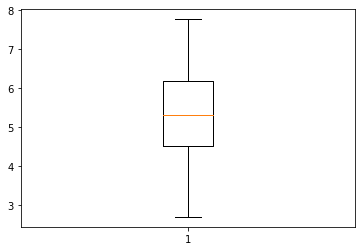

In [39]:
Happiness_Score_BoxPlot = plt.boxplot(combined_data['Happiness_Score'], whis=[0,100])

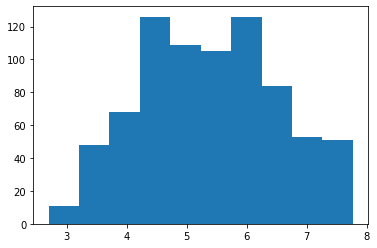

In [40]:
Happiness_Score_Histogram = plt.hist(combined_data['Happiness_Score'], bins=10)

<Figure size 1008x864 with 0 Axes>

<AxesSubplot:>

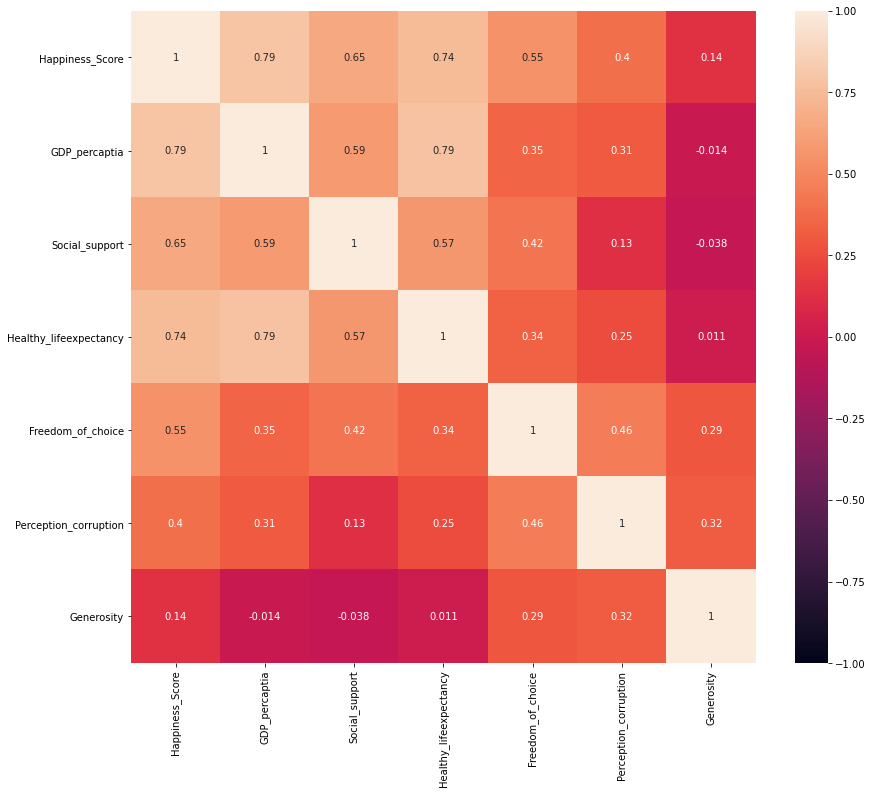

In [41]:
plt.figure(figsize=(14,12))
sns.heatmap(combined_data.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

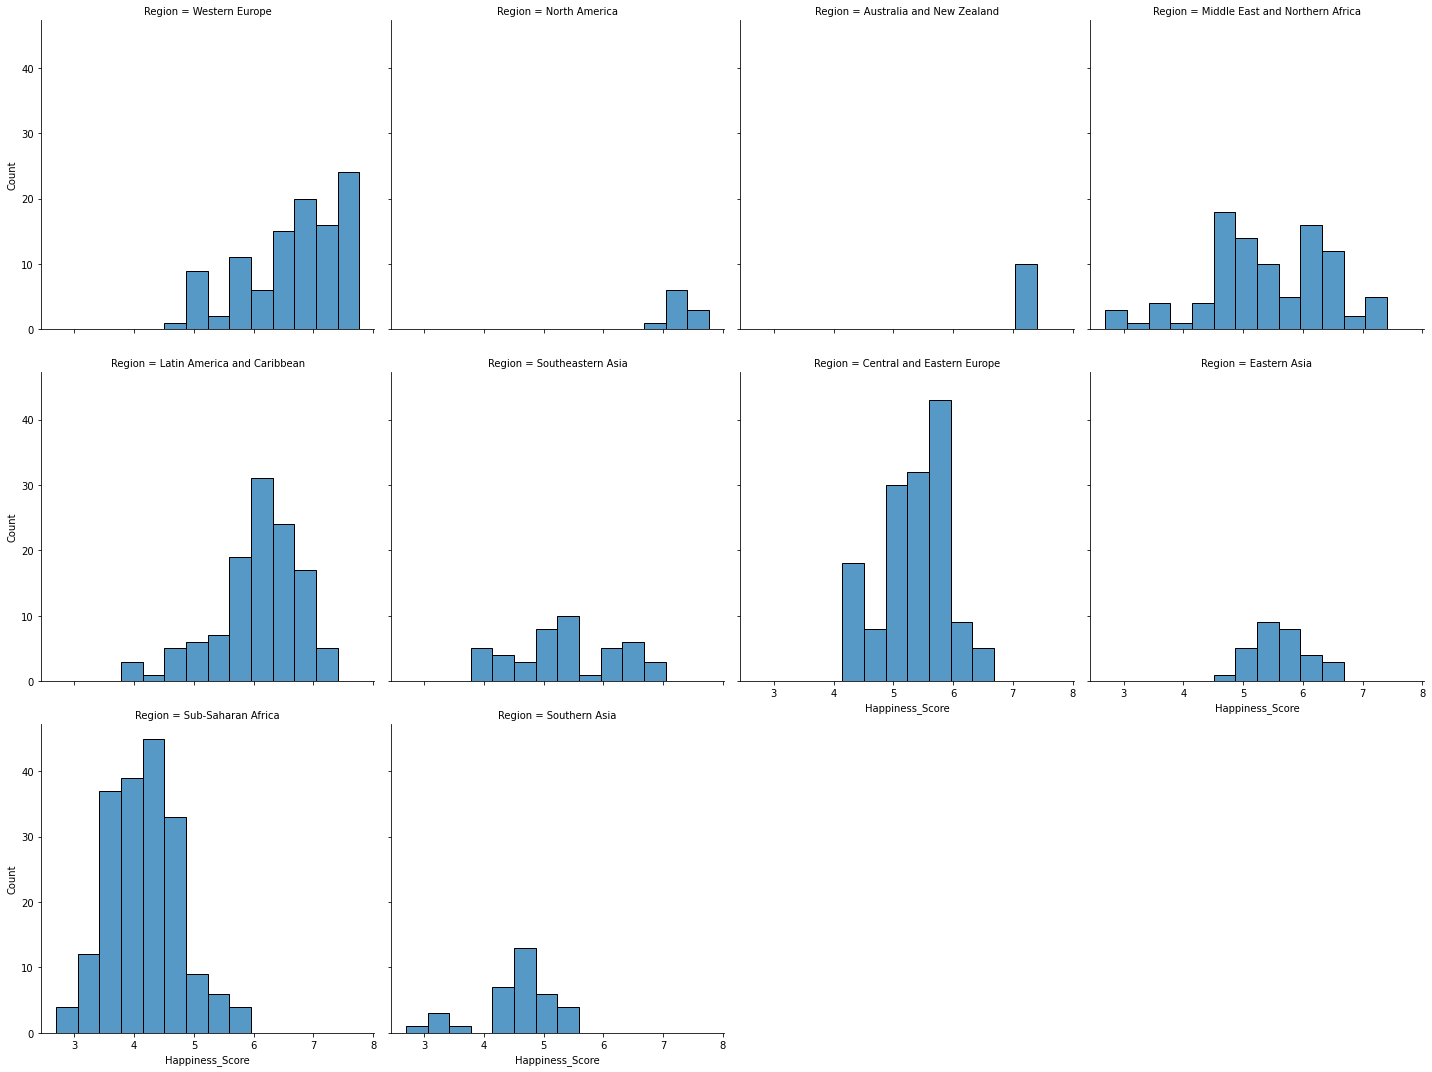

In [42]:
sns.displot(combined_data, x="Happiness_Score",col='Region',col_wrap=4, multiple='dodge')

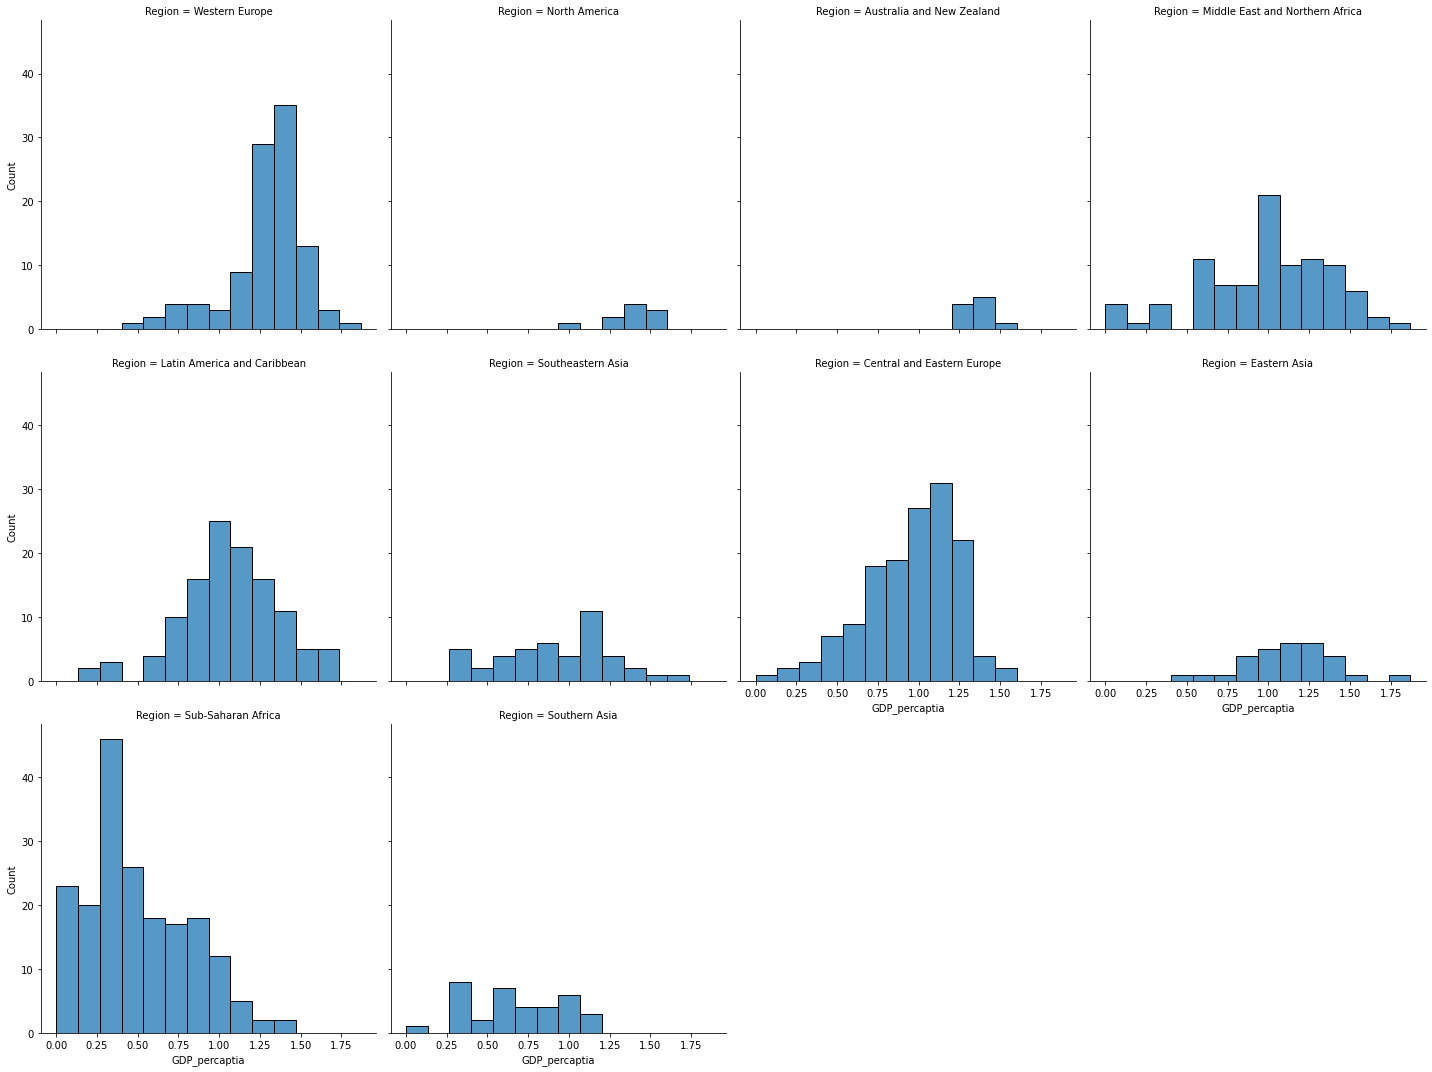

In [43]:
sns.displot(combined_data, x="GDP_percaptia",col='Region',col_wrap=4, multiple='dodge')

C:\Users\vasus\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Happiness_Level', ylabel='GDP_percaptia'>

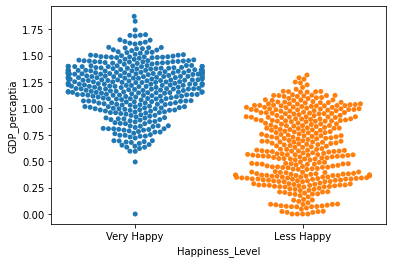

In [44]:
sns.swarmplot(x=combined_data['Happiness_Level'],
              y=combined_data['GDP_percaptia'])

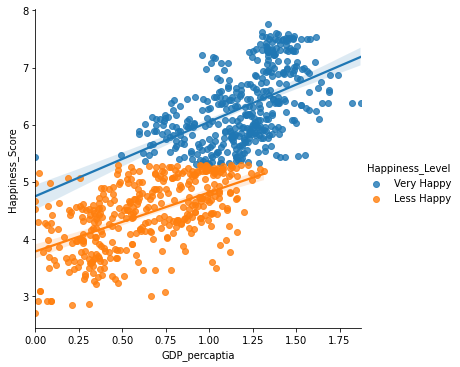

In [45]:
sns.lmplot(x="GDP_percaptia", y="Happiness_Score", hue="Happiness_Level", data=combined_data)

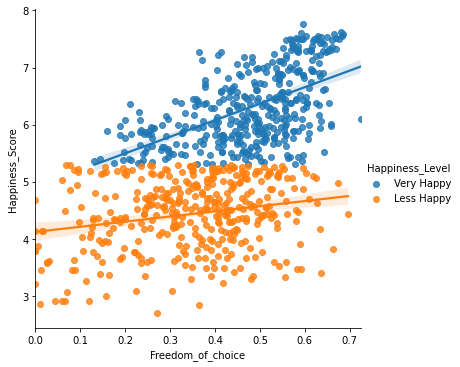

In [46]:
sns.lmplot(x="Freedom_of_choice", y="Happiness_Score", hue="Happiness_Level", data=combined_data)

In [47]:
combined_data.head()

Country          Region  Happiness_Score  GDP_percaptia  \
2015 0  Switzerland  Western Europe            7.587        1.39651   
     1      Iceland  Western Europe            7.561        1.30232   
     2      Denmark  Western Europe            7.527        1.32548   
     3       Norway  Western Europe            7.522        1.45900   
     4       Canada   North America            7.427        1.32629   

        Social_support  Healthy_lifeexpectancy  Freedom_of_choice  \
2015 0         1.34951                 0.94143            0.66557   
     1         1.40223                 0.94784            0.62877   
     2         1.36058                 0.87464            0.64938   
     3         1.33095                 0.88521            0.66973   
     4         1.32261                 0.90563            0.63297   

        Perception_corruption  Generosity Happiness_Level  
2015 0                0.41978     0.29678      Very Happy  
     1                0.14145     0.43630      Very Happy  
     2                0.48357     0.34139      Very Happy  
     3                0.36503     0.34699      Very Happy  
     4                0.32957     0.45811      Very Happy

In [48]:
combined_data.reset_index(inplace=True)
combined_data.head()

,level_0,level_1,Country,Region,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity,Happiness_Level
0,2015,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Very Happy
1,2015,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Very Happy
2,2015,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Very Happy
3,2015,3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Very Happy
4,2015,4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Very Happy


In [49]:
combined_data.rename(columns={"level_0": "Year"}, inplace=True)

In [50]:
combined_data.head()

,Year,level_1,Country,Region,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity,Happiness_Level
0,2015,0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Very Happy
1,2015,1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Very Happy
2,2015,2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Very Happy
3,2015,3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Very Happy
4,2015,4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Very Happy


In [51]:
del combined_data['level_1']

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">
Model Selection and Model Fitting </p><br>

In [52]:
combined_data.head()

,Year,Country,Region,Happiness_Score,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity,Happiness_Level
0,2015,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Very Happy
1,2015,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Very Happy
2,2015,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Very Happy
3,2015,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Very Happy
4,2015,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,Very Happy


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Creating the independent variables and dependent variables set  </p><br>

We have two independent variables set as from our data exploration,we did see that values are skewed in different regions. For example, the Middle East and North Africa region is has scores ranging from the extreme ends while for Eastern Asia the scores are
concentrated around the upper half. 

Therefore, we want to see test if including the information about the region will help the model to perform bettere.

In [53]:
y = combined_data['Happiness_Score'] #Dependent Data
X1 = combined_data.drop(['Happiness_Score','Region','Country','Happiness_Level'], axis = 1) #Independent Data
X2 = combined_data.drop(['Happiness_Score','Country','Happiness_Level'], axis = 1) #Independent Data
pd.DataFrame(X1)
pd.DataFrame(X2)

,Year,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity
0,2015,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
776,2019,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
777,2019,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
778,2019,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
779,2019,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


,Year,Region,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity
0,2015,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...
776,2019,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
777,2019,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
778,2019,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
779,2019,Sub-Saharan Africa,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Creating Dummies for Year  </p><br>

In [54]:
X1 = pd.get_dummies(X1, columns=['Year'], drop_first = True)
X1

,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity,Year_2016,Year_2017,Year_2018,Year_2019
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0,0,0,0
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0,0,0,0
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,0,0,0
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0,0,0,0
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
776,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,0,0,0,1
777,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0,0,0,1
778,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0,0,0,1
779,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,0,0,0,1


In [55]:
X2 = pd.get_dummies(X2, columns=['Year'], drop_first = True)
X2

,Region,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity,Year_2016,Year_2017,Year_2018,Year_2019
0,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0,0,0,0
1,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0,0,0,0
2,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,0,0,0
3,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0,0,0,0
4,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
776,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,0,0,0,1
777,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0,0,0,1
778,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0,0,0,1
779,Sub-Saharan Africa,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,0,0,0,1


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Creating Dummies for Region </p><br>

In [56]:
#Creating Dummies for Region 
X2 = pd.get_dummies(X2, columns=['Region'], drop_first = True)
X2

,GDP_percaptia,Social_support,Healthy_lifeexpectancy,Freedom_of_choice,Perception_corruption,Generosity,Year_2016,Year_2017,Year_2018,Year_2019,Region_Central and Eastern Europe,Region_Eastern Asia,Region_Latin America and Caribbean,Region_Middle East and Northern Africa,Region_North America,Region_Southeastern Asia,Region_Southern Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,0,0,0,1,0,0,0,0,0,0,0,1,0
777,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0,0,0,1,0,0,0,0,0,0,0,1,0
778,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0,0,0,1,0,0,0,0,0,0,1,0,0
779,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,0,0,0,1,0,0,0,0,0,0,0,1,0


<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Running the Models </p><br>

In [57]:
X1_train, X1_test, y_train, y_test=train_test_split(X1, y, test_size=0.33,random_state=0)
X2_train, X2_test, y_train, y_test=train_test_split(X2, y, test_size=0.33,random_state=0)

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
#Test with Linear Regression without Region
regressor=LinearRegression()
regressor.fit(X1_train, y_train)
## predicting with the test dataset
y1_prediction=regressor.predict(X1_test)
rms_lr1 = mean_squared_error(y1_prediction, y_test, squared=False)
rms_lr1
R2_lr1= r2_score(y1_prediction, y_test)
R2_lr1

LinearRegression()

0.5190834108391507

0.7339958188204179

In [59]:
#Test with Linear Regression Region
regressor=LinearRegression()
regressor.fit(X2_train, y_train)
## predicting with the test dataset
y2_prediction=regressor.predict(X2_test)
rms_lr2 = mean_squared_error(y2_prediction, y_test, squared=False)
rms_lr2
R2_lr2= r2_score(y2_prediction, y_test)
R2_lr2

LinearRegression()

0.484206332859564

0.7678178554735753

<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Results from the regression models with and without region </p><br>

We do notice above that the model with the region variable is performing better than the model without the region due to small Root Mean Square Value and higher R-Squared value.
Therefore, we will be using the region variable in the models to predict the happiness level

In [60]:
y = combined_data['Happiness_Score'] #Dependent Data
y1 = combined_data['Happiness_Level']
X2_train, X2_test, y1_train, y1_test=train_test_split(X2, y1, test_size=0.33,random_state=0)

LogisticRegression()

0.8604651162790697

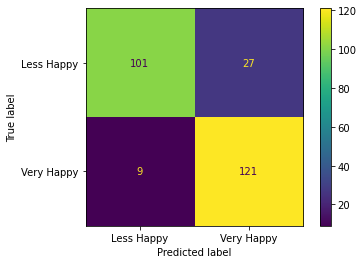

In [61]:
#Test with Logistic Regression 
logRegressor = LogisticRegression()
logRegressor.fit(X2_train, y1_train)
log_predict = logRegressor.predict(X2_test)
accuracy_score(y_true = y1_test, y_pred = log_predict)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logRegressor, X2_test, y1_test)

DecisionTreeClassifier(max_depth=20)

0.8449612403100775

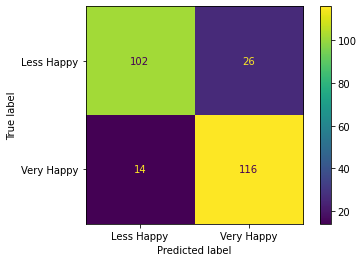

In [62]:
#Test with Decision Tree Classifier
classifierT =  DecisionTreeClassifier(max_depth=20)
classifierT.fit(X2_train,y1_train)
dt_predict = classifierT.predict(X2_test)
accuracy_score(y_true = y1_test, y_pred = dt_predict)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifierT, X2_test, y1_test)

<p style="font-family: Arial; font-size:1.75em;color:Green; font-style:bold">
Logistic Rregssion is the best model to predict happiness levels</p><br>



In [63]:
lowgdp_highfreedom_generosity = [[0.5,0.5,0.4,1.0,0.5,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1]]

In [64]:
highgdp_zerofreedom_generosity = [[1.6,0.1,1.5,0.1,0.5,0.1,0,0,0,0,0,0,0,0,1,0,0,0,1]]

In [65]:
log_predict = logRegressor.predict(lowgdp_highfreedom_generosity)
log_predict

array(['Less Happy'], dtype=object)

In [66]:
log_predict = logRegressor.predict(highgdp_zerofreedom_generosity)
log_predict

array(['Very Happy'], dtype=object)

<p style="font-family: Arial; font-size:2.75em;color:Purple; font-style:bold">
Conclusion</p><br>

In conclusion, we can see from our data exploration that GDP per captia has very strong correlation to Happiness scores while other measures such as freedom of choice or generatosity are not strongly correlated to it. Ultimately, the aim of the Hapiness Report is to 
provide different policy makers an alternative view to how the formulate decisions in a country instead of solely relying on GDP per captia as a mesaure of the countries progress. 

However, similar to numerous reserach papers claiming the validitiy of the happiness scores due to its over reliance on GDP per capita, while models are accurate they are also highlighting a similar issues that happiness levels majority of the time are determined by the GDP per captia levels.

We validated it by testing two polar opposite inputs. 
1. lowgdp_highfreedom_generosity = Extremely high levels of freedom and generosity but low levels of GDP per captia. 
2. highgdp_zerofreedom_generosity = Exteremly high level of GDP per capita but zero freedom or generosity. 


As expected, it turn out that a country with zero freedom or generosity is still happier than a country with high levles of freedom and generosity but low GDP levels.